For context, **Sprocket Central Pty Ltd** is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please **recommend which of these 1000 new customers should be targeted to drive the most value for the organisation.**

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - **Data Exploration; Model Development and Interpretation.**

*Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. *

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

In [1]:
# Import basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo

In [2]:
# loading dataset - merged dataset based on customer id

cust_df =  pd.read_csv('merged_df.csv')
cust_df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
cust_df.sample(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
548,549,1,543,2017-01-25,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Affluent Customer,N,Yes,17.0,49.0,20 Debs Road,2307.0,New South Wales,Australia,4.0
2529,2530,56,1151,2017-10-16,0.0,Approved,Norco Bicycles,Mountain,low,small,...,High Net Worth,N,Yes,19.0,57.0,40570 Acker Alley,2166.0,New South Wales,Australia,9.0


In [4]:
null_df = cust_df.isna().sum()
null_df.loc[null_df> 0] 

online_order                            360
brand                                   197
product_line                            197
product_class                           197
product_size                            197
standard_cost                           197
product_first_sold_date                 197
first_name                                3
last_name                               645
gender                                    3
past_3_years_bike_related_purchases       3
job_title                              2397
job_industry_category                  3232
wealth_segment                            3
deceased_indicator                        3
owns_car                                  3
tenure                                  449
age                                       3
address                                  32
postcode                                 32
state                                    32
country                                  32
property_valuation              

In [5]:
# Handling the missing values/replacement

In [6]:
def unique (df, column_name):
    for col in column_name:
        print('{} :\n {}'.format(col,df[col].unique()))

In [7]:
unique(cust_df,['online_order','brand','product_line','product_class',
                'product_size','standard_cost','product_first_sold_date','first_name',
               'last_name','gender','past_3_years_bike_related_purchases','job_title','job_industry_category',
               'wealth_segment','deceased_indicator','owns_car','tenure','age','address','postcode','state',
               'country','property_valuation'])

online_order :
 [ 0.  1. nan]
brand :
 ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
product_line :
 ['Standard' 'Road' 'Mountain' 'Touring' nan]
product_class :
 ['medium' 'low' 'high' nan]
product_size :
 ['medium' 'large' 'small' nan]
standard_cost :
 [  53.62       388.92       248.82       381.1        709.48
  829.65        45.26        13.44       380.74       161.6
  459.71        56.93       154.4       1479.11       818.01
 1167.18       388.72        57.74       596.55       270.3
  513.85       954.82      1531.42       376.84      1259.36
 1105.75       108.76       675.03        74.51       598.76
  589.27       649.49       125.07       211.37       795.1
  993.66       136.73       290.41        75.26       874.9
 1759.85         7.21      1082.36       677.48       137.9
  141.4        131.92       933.84       707.4        748.9
  594.68       215.14       205.36       298.72       614.8
  333.18        84.99       400.13    

In [8]:
def fill_na(df, column_name):   
    for col in column_name:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
fill_na(cust_df,['online_order','brand','product_line','product_class',
                'product_size','standard_cost','product_first_sold_date','first_name',
               'last_name','gender','past_3_years_bike_related_purchases','job_title','job_industry_category',
               'wealth_segment','deceased_indicator','owns_car','tenure','age','address','postcode','state',
               'country','property_valuation'])

In [10]:
null_df = cust_df.isna().sum()
null_df.loc[null_df> 0] 

Series([], dtype: int64)

In [41]:
cust_df.to_excel('Final_merged_df.xlsx')

### RFM Analysis

In [12]:
import datetime as dt
cust_df['transaction_date']= pd.to_datetime(cust_df['transaction_date'])
cust_df['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')

In [13]:
now =  dt.datetime(2017,12,30)

In [14]:
df_recency = cust_df.groupby(by='customer_id',as_index=False)['transaction_date'].max()
df_recency.columns = ['CustomerID', 'LastTransactionDate']
df_recency['Recency'] = df_recency['LastTransactionDate'].apply(lambda x: (now - x).days)
df_recency.head()

,CustomerID,LastTransactionDate,Recency
0,1,2017-12-23,7
1,2,2017-08-24,128
2,3,2017-09-19,102
3,4,2017-06-18,195
4,5,2017-12-14,16


In [15]:
frequency_df = cust_df.drop_duplicates().groupby(by=['customer_id'], as_index=False)['transaction_date'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,1,11
1,2,3
2,3,8
3,4,2
4,5,6


In [16]:
cust_df['Total'] = cust_df['list_price'] - cust_df['standard_cost']
monetary_df = cust_df.groupby(by='customer_id', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,1,3018.09
1,2,2226.26
2,3,3362.81
3,4,220.57
4,5,2394.94


In [17]:
RFM_df = df_recency.merge(frequency_df, on='CustomerID')
RFM_df = RFM_df.merge(monetary_df, on='CustomerID').drop(columns='LastTransactionDate')
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary
0,1,7,11,3018.09
1,2,128,3,2226.26
2,3,102,8,3362.81
3,4,195,2,220.57
4,5,16,6,2394.94


In [18]:
RFM_df['R_rank'] = RFM_df['Recency'].rank(ascending=False)
RFM_df['F_rank'] = RFM_df['Frequency'].rank(ascending=True)
RFM_df['M_rank'] = RFM_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
RFM_df['R_rank_norm'] = (RFM_df['R_rank']/RFM_df['R_rank'].max())*100
RFM_df['F_rank_norm'] = (RFM_df['F_rank']/RFM_df['F_rank'].max())*100
RFM_df['M_rank_norm'] = (RFM_df['F_rank']/RFM_df['M_rank'].max())*100
 
RFM_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1,7,11,3018.09,89.988476,97.838534,97.810532
1,2,128,3,2226.26,12.921348,12.367592,12.364053
2,3,102,8,3362.81,19.014693,83.395362,83.371494
3,4,195,2,220.57,3.817344,4.308617,4.307384
4,5,16,6,2394.94,77.297609,57.171486,57.155123


In [19]:
RFM_df['RFM_Score'] = 0.15*RFM_df['R_rank_norm']+0.28*RFM_df['F_rank_norm']+0.57*RFM_df['M_rank_norm']
RFM_df['RFM_Score'] *= 0.05
RFM_df = RFM_df.round(2)
RFM_df[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,1,4.83
1,2,0.62
2,3,3.69
3,4,0.21
4,5,3.01
5,6,1.99
6,7,0.54


In [20]:
RFM_df["Customer_segment"] = np.where(RFM_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        RFM_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    RFM_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(RFM_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
RFM_df.head(20)

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,1,7,11,3018.09,89.99,97.84,97.81,4.83,Top Customers
1,2,128,3,2226.26,12.92,12.37,12.36,0.62,Lost Customers
2,3,102,8,3362.81,19.01,83.40,83.37,3.69,Medium Value Customer
3,4,195,2,220.57,3.82,4.31,4.31,0.21,Lost Customers
4,5,16,6,2394.94,77.30,57.17,57.16,3.01,Medium Value Customer
...,...,...,...,...,...,...,...,...,...
15,16,99,5,4521.84,19.89,40.42,40.41,1.87,Low Value Customers
16,17,0,5,2015.61,100.00,40.42,40.41,2.47,Low Value Customers
17,18,134,7,3543.38,11.55,72.13,72.11,3.15,Medium Value Customer
18,19,102,3,2951.79,19.01,12.37,12.36,0.67,Lost Customers


In [21]:
def score_stats (x):
    if x <= 1:
        return 1
    elif x <= 2:
        return 2
    elif x <= 3:
        return 3
    elif x <= 4:
        return 4
    elif x <= 5:
        return 5  

In [22]:
RFM_df['Final_Score'] = RFM_df['RFM_Score'].map(score_stats)

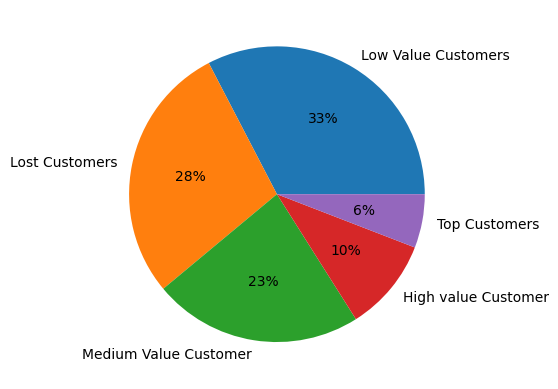

In [23]:
plt.pie(RFM_df.Customer_segment.value_counts(),
        labels=RFM_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [24]:
RFM_df.to_excel('RFM_DF.xlsx')

In [25]:
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,Final_Score
0,1,7,11,3018.09,89.99,97.84,97.81,4.83,Top Customers,5
1,2,128,3,2226.26,12.92,12.37,12.36,0.62,Lost Customers,1
2,3,102,8,3362.81,19.01,83.40,83.37,3.69,Medium Value Customer,4
3,4,195,2,220.57,3.82,4.31,4.31,0.21,Lost Customers,1
4,5,16,6,2394.94,77.30,57.17,57.16,3.01,Medium Value Customer,4


In [26]:
RFM_df['Final_Score'].value_counts()

2    838
4    801
3    773
5    560
1    522
Name: Final_Score, dtype: int64

Text(0, 0.5, 'Recency')

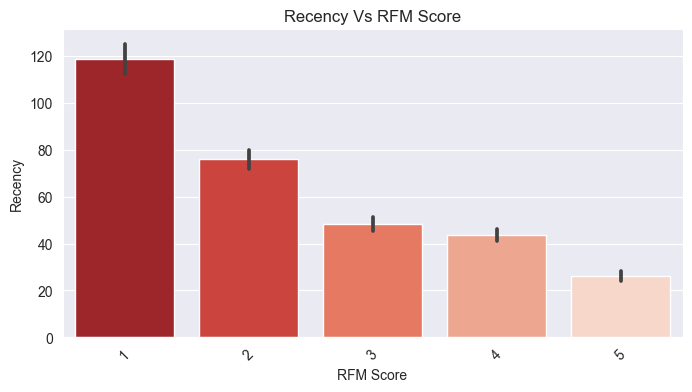

In [27]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
a = sns.barplot(data=RFM_df, x='Final_Score',y='Recency',palette='Reds_r')
a.set_title("Recency Vs RFM Score")
a.set_xlabel( "RFM Score")
plt.xticks(rotation=45)
a.set_ylabel( "Recency")

Text(0, 0.5, 'Frequency')

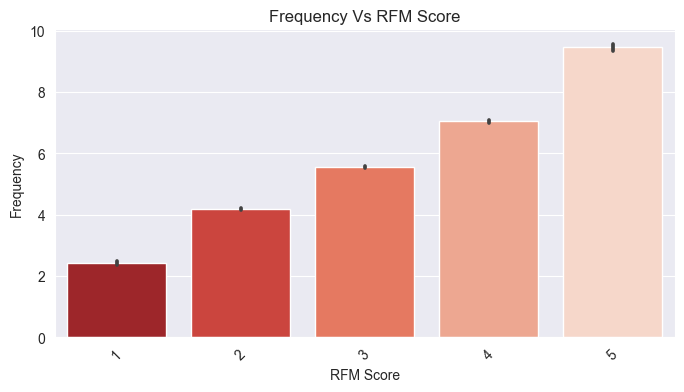

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
a = sns.barplot(data=RFM_df, x='Final_Score',y='Frequency',palette='Reds_r')
a.set_title("Frequency Vs RFM Score")
a.set_xlabel( "RFM Score")
plt.xticks(rotation=45)
a.set_ylabel( "Frequency")

Text(0, 0.5, 'Monetary')

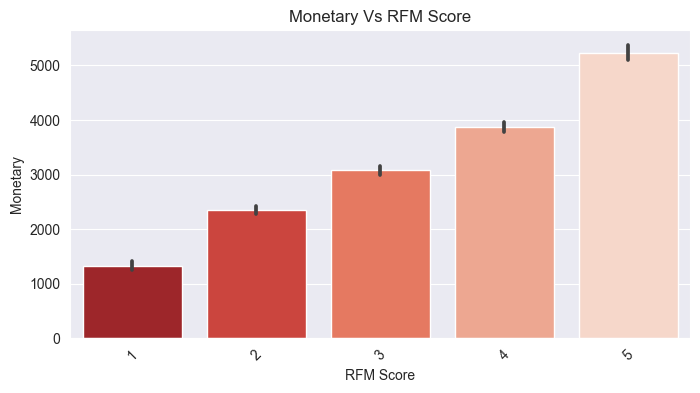

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
a = sns.barplot(data=RFM_df, x='Final_Score',y='Monetary',palette='Reds_r')
a.set_title("Monetary Vs RFM Score")
a.set_xlabel( "RFM Score")
plt.xticks(rotation=45)
a.set_ylabel( "Monetary")

([<matplotlib.axis.XTick at 0x2091a904640>,
 [Text(0, 0, 'Lost Customers'),
  Text(1, 0, 'Low Value Customers'),
  Text(2, 0, 'Medium Value Customer'),
  Text(3, 0, 'High Value Customer'),
  Text(4, 0, 'Top Customers')])

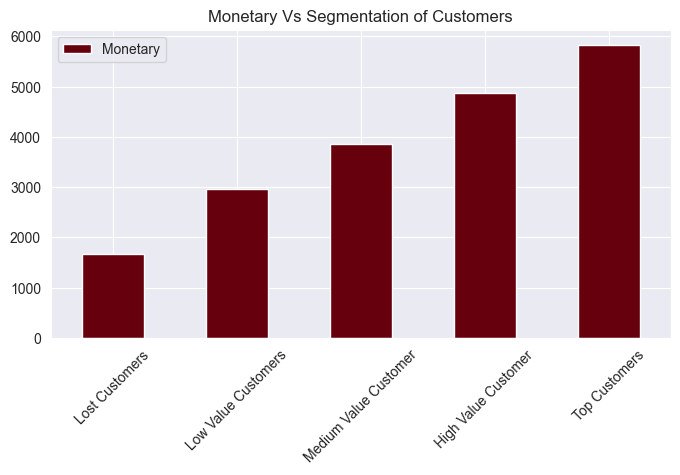

In [30]:
dfm=pd.DataFrame(RFM_df.groupby('Customer_segment').agg('Monetary').mean().reset_index())
fig, ax = plt.subplots()
dfm.sort_values('Monetary', ascending=True).plot(kind='bar', colormap='Reds_r', ax=ax, figsize=(8,4))
ax.set_title("Monetary Vs Segmentation of Customers")
plt.xticks(rotation=45)
plt.xticks([0, 1, 2,3,4], ['Lost Customers', 'Low Value Customers','Medium Value Customer','High Value Customer', 'Top Customers'])

In [31]:
dfm.describe()

,Monetary
count,5.000000
mean,3843.201055
std,1619.869877
min,1675.432216
25%,2966.724447
50%,3866.492247
75%,4871.570366
max,5835.786000


([<matplotlib.axis.XTick at 0x2091aa1fca0>,
 [Text(4, 0, 'Lost Customers'),
  Text(3, 0, 'Low Value Customers'),
  Text(2, 0, 'Medium Value Customer'),
  Text(1, 0, 'High Value Customer'),
  Text(0, 0, 'Top Customers')])

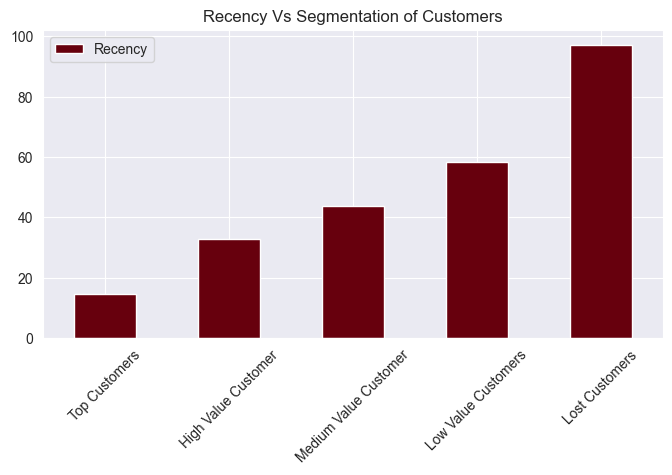

In [32]:
dfr=pd.DataFrame(RFM_df.groupby('Customer_segment').agg('Recency').mean().reset_index())
fig, ax = plt.subplots()
dfr.sort_values('Recency', ascending=True).plot(kind='bar', colormap='Reds_r', ax=ax, figsize=(8,4))
ax.set_title("Recency Vs Segmentation of Customers")
plt.xticks(rotation=45)
plt.xticks([4, 3, 2,1,0], ['Lost Customers', 'Low Value Customers','Medium Value Customer','High Value Customer', 'Top Customers'])

In [33]:
dfr.describe()

,Recency
count,5.000000
mean,49.311865
std,31.139008
min,14.682927
25%,32.861972
50%,43.584270
75%,58.189474
max,97.240685


([<matplotlib.axis.XTick at 0x2091a9f4be0>,
 [Text(0, 0, 'Lost Customers'),
  Text(1, 0, 'Low Value Customers'),
  Text(2, 0, 'Medium Value Customer'),
  Text(3, 0, 'High Value Customer'),
  Text(4, 0, 'Top Customers')])

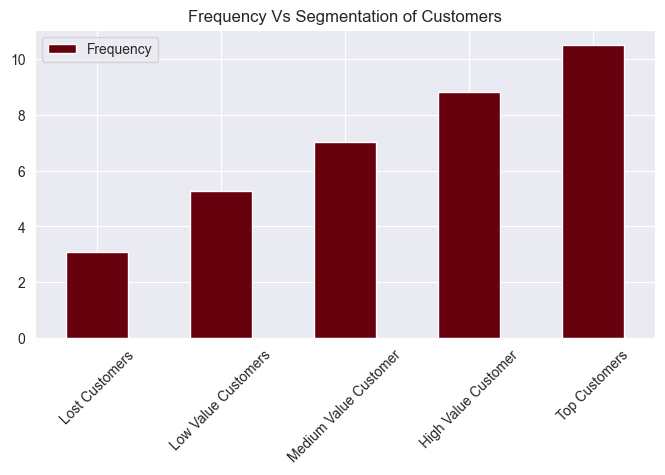

In [34]:
dff=pd.DataFrame(RFM_df.groupby('Customer_segment').agg('Frequency').mean().reset_index())
fig, ax = plt.subplots()
dff.sort_values('Frequency', ascending=True).plot(kind='bar', colormap='Reds_r', ax=ax, figsize=(8,4))
ax.set_title("Frequency Vs Segmentation of Customers")
plt.xticks(rotation=45)
plt.xticks([0, 1, 2,3,4], ['Lost Customers', 'Low Value Customers','Medium Value Customer','High Value Customer', 'Top Customers'])

In [35]:
dff.describe()

,Frequency
count,5.000000
mean,6.951000
std,2.923057
min,3.081571
25%,5.265789
50%,7.044944
75%,8.830986
max,10.531707


In [36]:
final_df = pd.merge(RFM_df, cust_df, left_index=True, right_index=True)
final_df.sample()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,Final_Score,...,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation,Total
1936,1940,76,4,3259.41,29.69,24.68,24.67,1.27,Lost Customers,2,...,N,Yes,7.0,45.0,277 Lindbergh Alley,2100.0,New South Wales,Australia,11.0,1069.55


<AxesSubplot:xlabel='age'>

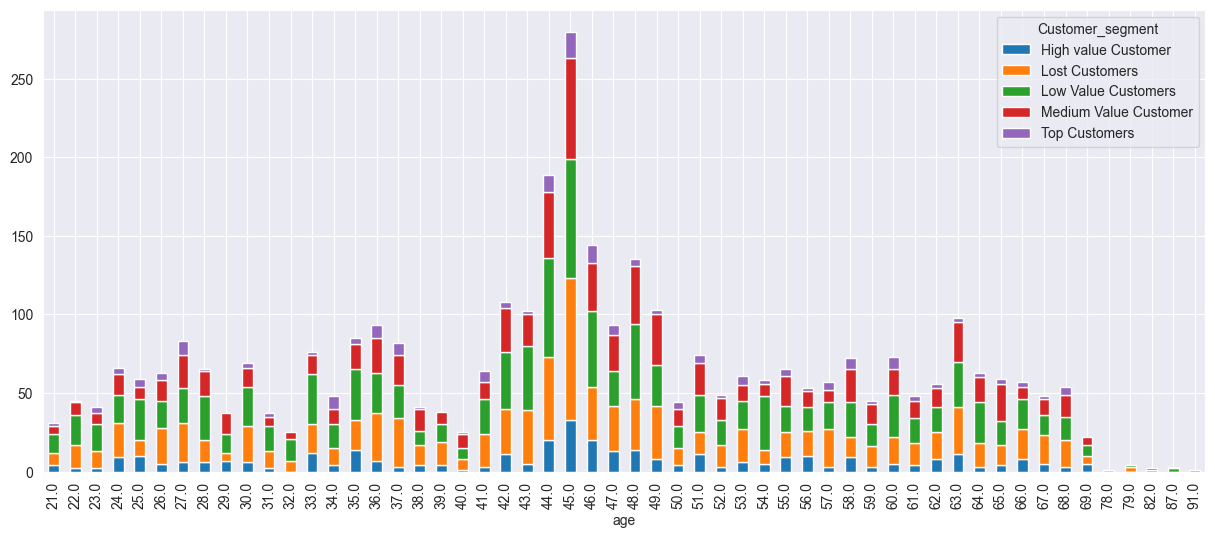

In [37]:
final_df.groupby('age')['Customer_segment'].value_counts().unstack(level=1).plot.bar(stacked=True, figsize=(15,6))

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'High value Customer'),
  Text(1, 0, 'Lost Customers'),
  Text(2, 0, 'Low Value Customers'),
  Text(3, 0, 'Medium Value Customer'),
  Text(4, 0, 'Top Customers')])

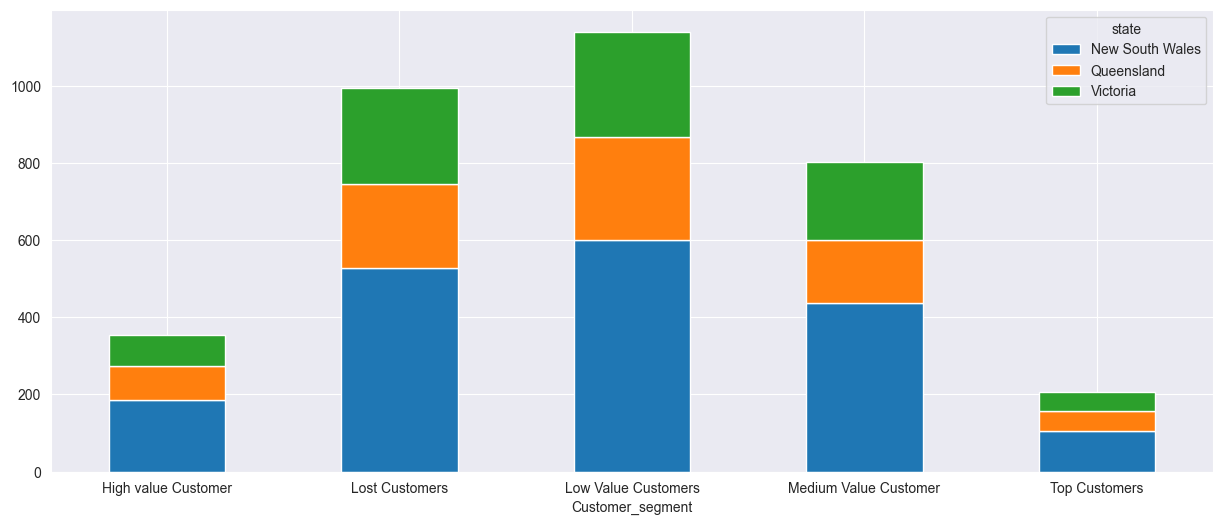

In [38]:
final_df.groupby('Customer_segment')['state'].value_counts().unstack(level=1).plot.bar(stacked=True, figsize=(15,6))
plt.xticks(rotation=0)

In [39]:
final_df.groupby('Customer_segment')['state'].value_counts()

Customer_segment       state          
High value Customer    New South Wales    186
                       Queensland          87
                       Victoria            82
Lost Customers         New South Wales    528
                       Victoria           248
                       Queensland         217
Low Value Customers    New South Wales    601
                       Victoria           273
                       Queensland         266
Medium Value Customer  New South Wales    438
                       Victoria           200
                       Queensland         163
Top Customers          New South Wales    104
                       Queensland          52
                       Victoria            49
Name: state, dtype: int64